<a href="https://colab.research.google.com/github/lakatosgabor/OpenCV_gyakorlat/blob/main/1_konzultacio_7_resz_arcfelismeres_kep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. OpenCV importálás
A kódolás megkezdése előtt érdemes az Open CV verzióját lekérni.
Egyrészt meg kell vizsgálnunk, hogy létezik-e a futtatókörnyezetben, másrészt az egyes függvényhívások, és a függvények paraméterezései verziónként eltérő lehet.

Ha nem áll rendelkezésre, hozz létre egy kód blokkot a bal felső sarokban található " + Kód " gommbal, majd futtasd a követező parancsot:

```
!pip install opencv-python-headless
```


In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

# OpenCV verziójának lekérdezése
versionOfOpenCV = cv.__version__
print("OpenCV verzió: " + versionOfOpenCV)

OpenCV verzió: 4.8.0


#2. Drive csatlakoztatása

Futtasd az alábbi kódot a Google Drive tárhely csatlkoztatásához.
Add meg a Google által kért engedélyeket.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Kép betöltése Google Drive-ból
A Drive-ba feltölött fájlokat a "/content/drive/MyDrive/" útvonal alatt érhetjük el. Az útvonal megtekinthető a bal oldali File Expoler-ben. Egy adott fájlt javasolt először kikeresni az Expolerben, majd jobb gombbal kattintva másoljuk ki a fájl elérési útvonalát. Ezáltal elkerülhetjük az elgépeléseket.

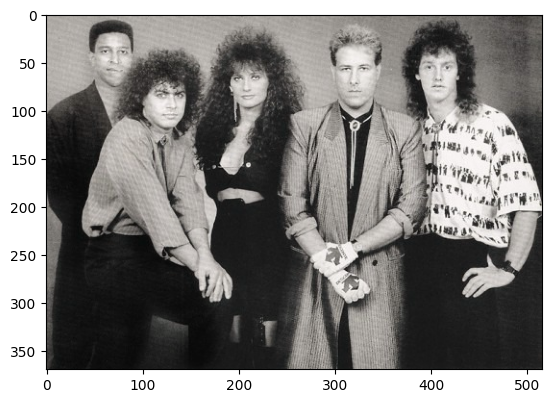

In [ ]:
# Beolvassa a képet a megadott elérési útról, és szürke árnyalatos képként tárolja el a src változóban.
src = cv.imread("/content/drive/MyDrive/images/Moire5.jpg", cv.COLOR_BGR2GRAY)
plt.imshow(src, 'gray')

#4. Arcfelismerés

## 4.1 Osztályozó betöltése
Töltsük be az OpenCV-be beépített, előre betanított Haar Cascade osztályozót. Figyeljük meg, hogy a haarcascade_frontalface_default.xml nevű fájlt használjuk. Ezt az osztályozót kifejezetten az elülső arcok vizuális bemenetben történő észlelésére tervezték.

Az OpenCV más, előre kiképzett modelleket is kínál a képen belüli különböző objektumok – például egy személy szemének, mosolyának, felsőtestének – észlelésére.

In [ ]:
# Arcosztályozó létrehozása a CascadeClassifier segítségével.
face_classifier = cv.CascadeClassifier(
    cv.data.haarcascades + "haarcascade_frontalface_default.xml"
)

## 4.2 Arc megkeresése a képen

In [ ]:
# Arcok felismerése a detectMultiScale függvény segítségével.
'''
scaleFactor=1.1: Ez a paraméter meghatározza, hogy mennyire csökkentsük az inputképet a detektálás előtt.
A kép méretének növelése vagy csökkentése segíthet az arcok különböző méretű és távolságú objektumok esetén
való hatékonyabb detektálásában. A 1.1 érték azt jelenti, hogy minden lépésben az inputkép mérete 10%-kal növekszik.

minNeighbors=5: Ez a paraméter azt határozza meg, hogy hány szomszédos téglalapot kell találni ahhoz, hogy egy téglalapot
elfogadjunk. Egy magasabb érték több téglalpot fog elfogadni, ami lehetővé teszi a könnyebb detektálást, de a hamis pozitív
találatok számának növekedését is eredményezheti.

minSize=(40, 40): Ez a paraméter az arcképek minimális méretét határozza meg pixelben. Az alapértelmezett érték (40, 40)
azt jelenti, hogy csak azon téglalapokat fogadja el, amelyek legalább 40x40 pixel méretűek. Ennek az értéknek az állítása
segíthet kiszűrni a kisebb zajt és az olyan téglalapokat, amelyek túl kicsik az igazi arcokhoz képest.

'''
face = face_classifier.detectMultiScale(
    src, scaleFactor=1.1, minNeighbors=10, minSize=(40, 40)
)

## 4.3 Arc jelölése a képen

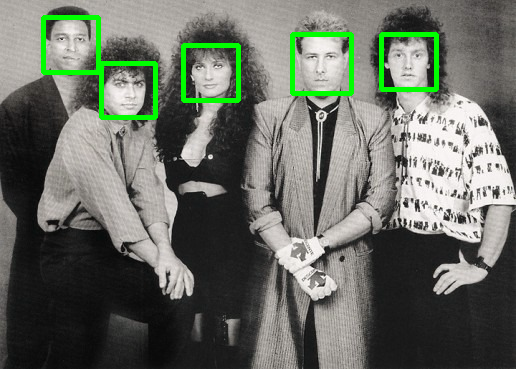

In [ ]:
# Az arcok koordinátáinak és méretének bejárása a detektált arcok listájában.
for (x, y, w, h) in face:
    # Zöld téglalapot rajzolunk minden arc köré a koordináták és méretek alapján.
    cv.rectangle(src, (x, y), (x + w, y + h), (0, 255, 0), 4)

# Az eredményképet BGR színformátumból RGB formátumba alakítjuk át.
img_rgb = cv.cvtColor(src, cv.COLOR_BGR2RGB)

# Az eredményképet megjelenítjük a cv2_imshow függvénnyel.
cv2_imshow(img_rgb)